## Loading the data

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(context='talk', style='whitegrid', palette='tab20')

In [3]:
df = pd.read_csv('bike_rental_hour.csv')

## First look at the data

In [4]:
df.shape

(17379, 17)

In [5]:
from tkit import *

In [6]:
feat_info(df)

,type,n unique,n null,0,1,2,17376,17377,17378
instant,int64,17379,0,1,2,3,17377,17378,17379
dteday,object,731,0,2011-01-01,2011-01-01,2011-01-01,2012-12-31,2012-12-31,2012-12-31
season,int64,4,0,1,1,1,1,1,1
yr,int64,2,0,0,0,0,1,1,1
mnth,int64,12,0,1,1,1,12,12,12
hr,int64,24,0,0,1,2,21,22,23
holiday,int64,2,0,0,0,0,0,0,0
weekday,int64,7,0,6,6,6,1,1,1
workingday,int64,2,0,0,0,0,1,1,1
weathersit,int64,4,0,1,1,1,1,1,1


## Feature engineering

In [7]:
# converting to datetime
df['date2'] = pd.to_datetime(df['dteday'])

In [8]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date2
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01


In [9]:
# integrating hour
df['date2'] += pd.to_timedelta(df['hr'], unit='h')

In [10]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date2
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


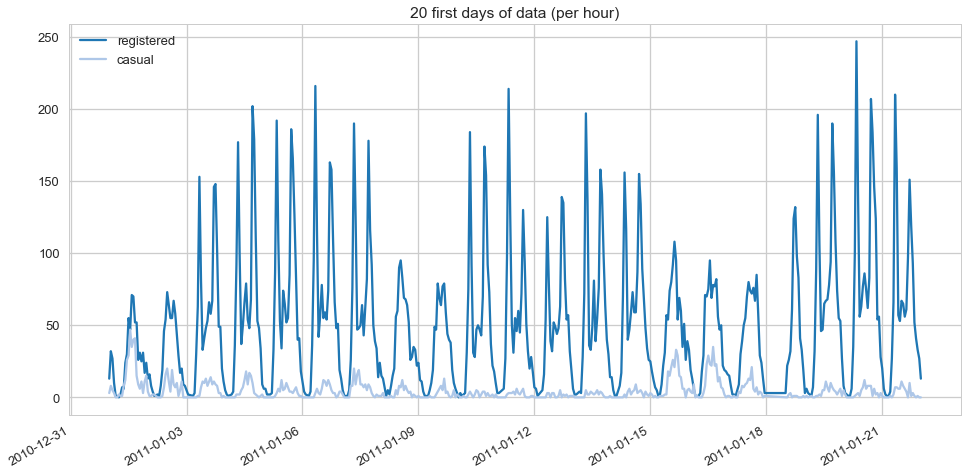

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df.date2.head(480), df.registered.head(480))
ax.plot(df.date2.head(480), df.casual.head(480))
fig.autofmt_xdate()
plt.title('20 first days of data (per hour)')
plt.legend()
plt.show()

In [12]:
# creating 'time of the day' feature

def assign_label(hour):
    if hour in np.arange(6,12):
        return 1
    elif hour in np.arange(12,18):
        return 2
    elif hour in np.arange(18,24):
        return 3
    elif hour in np.arange(0,6):
        return 4
    
df['time_label'] = df['hr'].apply(assign_label)    

## Training the models

In [13]:
# splitting to train and test

train = df.sample(frac=0.8, random_state=1)
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date2,time_label
15652,15653,2012-10-19,4,1,10,9,0,5,1,2,0.54,0.5152,0.94,0.1045,26,363,389,2012-10-19 09:00:00,1
3085,3086,2011-05-13,2,0,5,11,0,5,1,2,0.52,0.5000,0.83,0.1642,56,90,146,2011-05-13 11:00:00,1
1684,1685,2011-03-15,1,0,3,19,0,2,1,2,0.34,0.3182,0.71,0.2836,14,138,152,2011-03-15 19:00:00,3
10555,10556,2012-03-20,1,1,3,22,0,2,1,1,0.54,0.5152,0.77,0.0000,32,156,188,2012-03-20 22:00:00,3
14622,14623,2012-09-06,3,1,9,11,0,4,1,3,0.70,0.6667,0.84,0.1642,10,52,62,2012-09-06 11:00:00,1


In [14]:
test = df.loc[~df.index.isin(train.index)].copy()
test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date2,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00,4
14,15,2011-01-01,1,0,1,14,0,6,0,2,0.46,0.4545,0.72,0.2836,35,71,106,2011-01-01 14:00:00,2
15,16,2011-01-01,1,0,1,15,0,6,0,2,0.44,0.4394,0.77,0.2985,40,70,110,2011-01-01 15:00:00,2
18,19,2011-01-01,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,9,26,35,2011-01-01 18:00:00,3
20,21,2011-01-01,1,0,1,20,0,6,0,2,0.40,0.4091,0.87,0.2537,11,25,36,2011-01-01 20:00:00,3


### Linear regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [16]:
features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 
            'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']

In [17]:
df.corr()['cnt'].abs().sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
time_label    0.378318
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

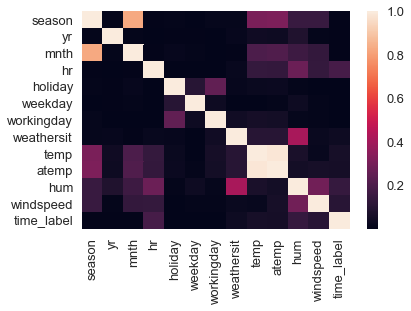

In [18]:
sns.heatmap(df[features].corr().abs())
plt.show()

In [19]:
features.remove('mnth') # multicollinearity with season
features.remove('atemp') # leaving 'temp' though 
features.remove('hr') # we made time_label

In [20]:
target = 'cnt'
print(features)
print(target)

['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'time_label']
cnt


In [21]:
model = LinearRegression()
model.fit(train[features], train[target])

train_pred = model.predict(train[features])
test_pred = model.predict(test[features])

In [22]:
train_pred

array([280.50591749, 180.36918746,  26.24526385, ..., 197.10714677,
       303.10748377, -59.40238613])

In [23]:
test_pred

array([-79.81305543, 116.66702311,  99.88792991, ..., 198.06695049,
       184.04760376, 116.22016594])

In [24]:
# we need to get rid of negative counts in predictions

train_pred[train_pred < 0] = 0
test_pred[test_pred < 0] = 0

In [25]:
train_rmsle = np.sqrt(mean_squared_log_error(train[target], train_pred))
test_rmsle = np.sqrt(mean_squared_log_error(test[target], test_pred))

print(train_rmsle, test_rmsle, sep=" ~ ")

1.2567379577849447 ~ 1.247997914027032


The model doesn't seem to have high variance (out-of-sample error is the same level as in-sample).  
But the overall result is still not that good (high bias).

In [26]:
def run_model(model):
    model.fit(train[features], train[target])

    train_pred = model.predict(train[features])
    test_pred = model.predict(test[features])
    train_pred[train_pred < 0] = 0
    test_pred[test_pred < 0] = 0
    
    train_rmsle = np.sqrt(mean_squared_log_error(train[target], train_pred))
    test_rmsle = np.sqrt(mean_squared_log_error(test[target], test_pred))

    print('train error is: {} \n test error is: {}'.format(train_rmsle, test_rmsle))
    #return (train_pred, test_pred)

In [27]:
# trying diff set of features
all_possible = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 
            'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']

from_corr = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'time_label']

few_intuitive = ['workingday', 'temp', 'hum', 'windspeed', 'time_label']

features = few_intuitive

In [28]:
model = LinearRegression()
run_model(model)

train error is: 1.1958692696256676 
 test error is: 1.1969601447545657


Few intuitive features performed the best so far.

### Trees

In [29]:
features = all_possible

In [30]:
# checking that all features are numerical
train[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 15652 to 327
Data columns (total 13 columns):
season        13903 non-null int64
yr            13903 non-null int64
mnth          13903 non-null int64
hr            13903 non-null int64
holiday       13903 non-null int64
weekday       13903 non-null int64
workingday    13903 non-null int64
weathersit    13903 non-null int64
temp          13903 non-null float64
atemp         13903 non-null float64
hum           13903 non-null float64
windspeed     13903 non-null float64
time_label    13903 non-null int64
dtypes: float64(4), int64(9)
memory usage: 2.1 MB


In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
model = DecisionTreeRegressor()
run_model(model)

train error is: 0.0015665635420657764 
 test error is: 0.4472970962922292


Wow...  
Of course we definitely have a high variance here. But it's already much better than Linear Reg!

In [33]:
# let's tweak the tree

model = DecisionTreeRegressor(min_samples_leaf = 5, min_samples_split = 12, random_state=1)
run_model(model)

train error is: 0.2693145717838639 
 test error is: 0.3913246596866393


That's something already. Though it still overfits slightly.  
It's time to try random forest.

### Random forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
model = RandomForestRegressor()
run_model(model)

train error is: 0.17562352050608482 
 test error is: 0.3531304593793248


Directly better without any tweaking.

In [36]:
# now tweaking it

model1 = RandomForestRegressor(n_estimators=100,  random_state=1, max_depth=20)
run_model(model1)

train error is: 0.15940770829376455 
 test error is: 0.3403345179475933


In [37]:
model2 = RandomForestRegressor(n_estimators=100,  random_state=1, min_samples_leaf=4)
run_model(model2)

train error is: 0.26126026694542775 
 test error is: 0.34902281303250365


In [38]:
model3 = RandomForestRegressor(n_estimators=100,  random_state=1, min_samples_split=5)
run_model(model3)

train error is: 0.1957686835896749 
 test error is: 0.34156739394309693


In [39]:
model4 = RandomForestRegressor(n_estimators=100,  random_state=1, max_depth=20, min_samples_split=5)
run_model(model4)

train error is: 0.19659172480450876 
 test error is: 0.3414506868308429


Model1 is the best one so far. Though it suffers from high variance. Let's try to run it with less features.

In [40]:
features = few_intuitive
run_model(model1)

train error is: 0.48336809209562515 
 test error is: 0.77797064752074


Nope :) not good.

In [41]:
features = from_corr
run_model(model1)

train error is: 0.3835863213536546 
 test error is: 0.7072002367488884


Again not good.

In [42]:
# Model1 is the best config so far
# let's try to have more trees though

features = all_possible

In [43]:
model1 = RandomForestRegressor(n_estimators=500,  random_state=1, max_depth=20)
run_model(model1)

train error is: 0.15798927110551925 
 test error is: 0.339172751921188


That's quite good. We'll stop on this.  
Now it's time to try with Kaggle dataset.